In [72]:
import requests
import json

In [73]:
session = requests.Session()

query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "item",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Agarkategori",
      "selection": {
        "filter": "item",
        "values": [
          "000"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/TK/TK1001/TK1001A/PersBilarA"

response = session.post(url, json=query)
response_json = json.loads(response.content.decode('utf-8-sig'))
car_per_region_data = response_json

In [74]:
car_per_region_data

{'columns': [{'code': 'Region', 'text': 'region', 'type': 'd'},
  {'code': 'Agarkategori', 'text': 'ägarkategori', 'type': 'd'},
  {'code': 'Tid', 'text': 'år', 'type': 't'},
  {'code': 'TK1001AB', 'text': 'Personbilar i trafik', 'type': 'c'}],
 'comments': [],
 'data': [{'key': ['00', '000', '2002'], 'values': ['4042790']},
  {'key': ['00', '000', '2003'], 'values': ['4075414']},
  {'key': ['00', '000', '2004'], 'values': ['4113424']},
  {'key': ['00', '000', '2005'], 'values': ['4153674']},
  {'key': ['00', '000', '2006'], 'values': ['4202463']},
  {'key': ['00', '000', '2007'], 'values': ['4258463']},
  {'key': ['00', '000', '2008'], 'values': ['4278995']},
  {'key': ['00', '000', '2009'], 'values': ['4300752']},
  {'key': ['00', '000', '2010'], 'values': ['4335182']},
  {'key': ['00', '000', '2011'], 'values': ['4401352']},
  {'key': ['00', '000', '2012'], 'values': ['4447165']},
  {'key': ['00', '000', '2013'], 'values': ['4495473']},
  {'key': ['00', '000', '2014'], 'values': ['4

In [75]:
# Create and filter the DataFrame in one step, and extract and convert year and values in another
df_cars = pd.DataFrame([
    {'Year': int(entry['key'][-1]), 'Total Cars': int(entry['values'][0])}
    for entry in car_per_region_data['data'] if entry['values'] != ['..']
])

# Group by year and calculate the total cars
total_cars_per_year = df_cars.groupby('Year', as_index=False)['Total Cars'].sum()

print(total_cars_per_year)

    Year  Total Cars
0   2002     4042790
1   2003     4075414
2   2004     4113424
3   2005     4153674
4   2006     4202463
5   2007     4258463
6   2008     4278995
7   2009     4300752
8   2010     4335182
9   2011     4401352
10  2012     4447165
11  2013     4495473
12  2014     4585519
13  2015     4669063
14  2016     4768060
15  2017     4845609
16  2018     4870783
17  2019     4887904
18  2020     4944067
19  2021     4986750
20  2022     4980543


In [76]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a formatter function
def y_fmt(x, _):
    return f'{int(x):,}'

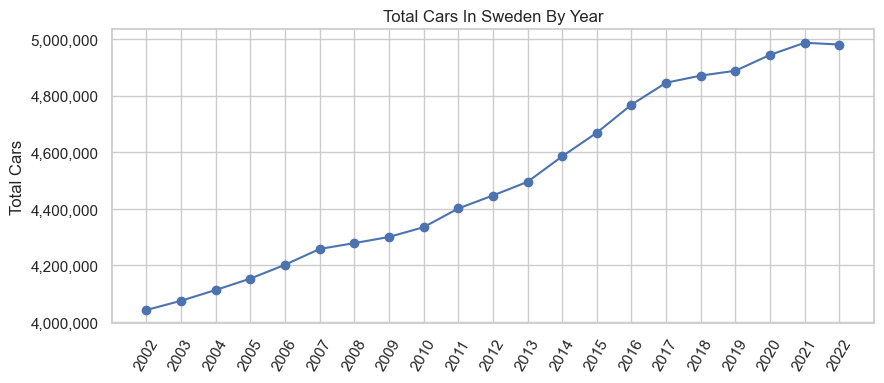

In [77]:
# Create the plot
plt.figure(figsize=(9, 4))
plt.plot(total_cars_per_year['Year'], total_cars_per_year['Total Cars'], marker='o', color='b', linestyle='-')
plt.ylabel('Total Cars')
plt.title('Total Cars In Sweden By Year')
plt.xticks(total_cars_per_year['Year'], rotation=60)
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.grid(True)
plt.tight_layout()
plt.show()